<a href="https://www.su.se/forskning/forskargrupper/data-science-research-group"><img src="https://www.pngkey.com/png/detail/853-8536888_stockholm-university-stockholm-university-logo.png" width="400" align="center"></a>

<h1><center>Clustering</center></h1>

# Pipeline In General
- Data - Preprocess(missing EDA) -> Standarize -> Give Algo (Clustering (Get Labels Predicted), Classifciation) -> Evaluate

### Recommendation for metrix Clustering
- When you have true labels use cluster purity
- Otherwise use silhoussete wala

## Introduction

There are many models for **clustering** out there. In this notebook, we will explore and compare some of the most renowned algorithms, using various metrics introduced in the class. Later, we will determine the optimal number of clusters by employing the Silhouette coefficient.

The clustering algorithms that we are going to use are as follows:
- K-Means
- Agglomerative (Single Linkage, Complete Linkage)
- DBSCAN

The measures that we evaluate the clustering algorithms' performance are as follows:
- Cluster Purity
- Silhouette coefficient


In this notebook we practice clustering with 2 example to show the differences of clustering algorithms:
- A random generated dataset (non-elliptical)
- A random generated dataset (elliptical)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">Create and Visualize of the Randomly Generated Datasets</a></li>
        <li><a href="#Performance_metrics">Clustering Performance Metrics</a></li>
            <ol>
                <li><a href="#Cluster_purity">Cluster Purity</a></li>
                <li><a href="#Silhouette_coefficient">Silhouette coefficient</a></li>
            </ol>
        <li><a href="#K-Means">K-Means Algorithm</a></li>
            <ol>
                <li><a href="#K-Means_understanding">Understanding K-Means and K-means++ Algorithm</a></li>
                <li><a href="#K-Means_setting_up">Setting up K-Means</a></li>
                <li><a href="#K-Means_visualization">K-Means Performance Visualization</a></li>
                <li><a href="#K-Means_evaluation">K-Means Performance Evaluation</a></li>
            </ol>
        <li><a href="#Agglomerative">Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkage)</a></li>
            <ol>
                <li><a href="#Agglomerative_understanding">Understanding Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkage)</a></li>
                <li><a href="#Agglomerative_setting_up">Setting up Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkage)</a></li>
                <li><a href="#Agglomerative_visualization">Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkagee) Performance Visualization</a></li>
                <li><a href="#Agglomerative_evaluation">Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkage) Performance Evaluation</a></li>
            </ol>
        <li><a href="#DBSCAN">DBSCAN Algorithm</a></li>
            <ol>
                <li><a href="#DBSCAN_understanding">Understanding DBSCAN Algorithm</a></li>
                <li><a href="#DBSCAN_setting_up">Setting up DBSCAN</a></li>
                <li><a href="#DBSCAN_visualization">DBSCAN Performance Visualization</a></li>
                <li><a href="#DBSCAN_evaluation">DBSCAN Performance Evaluation</a></li>
            </ol>
        <li><a href="#Practice_time">Practice time!</a></li>

</div>
<br>
<hr>

### Import libraries
Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

## Python Code Explanation

In data science and machine learning, several Python libraries are commonly used to facilitate data manipulation, visualization, and algorithm implementation. Below is an explanation of some common import statements used in these domains.

### Basic Imports

1. **random**
   - `import random`
   - The `random` module is used to generate random numbers. It provides various functions such as generating random integers, shuffling sequences, and selecting random elements from a list.

2. **numpy**
   - `import numpy as np`
   - NumPy (Numerical Python) is a fundamental package for scientific computing in Python. It provides support for arrays (including multi-dimensional), matrices, and high-level mathematical functions to operate on these arrays.

3. **matplotlib.pyplot**
   - `import matplotlib.pyplot as plt`
   - Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. `pyplot` is a module in Matplotlib that provides a MATLAB-like interface for making plots and graphs. `plt` is commonly used as an alias.

### Scikit-learn Imports

4. **sklearn**
   - `import sklearn`
   - Scikit-learn is one of the most popular machine learning libraries for Python. It features various classification, regression, and clustering algorithms including support vector machines, random forests, and k-means, and is designed to interoperate with NumPy and SciPy.

5. **sklearn.metrics**
   - `from sklearn.metrics import pairwise_distances, confusion_matrix`
   - This import statement brings in two specific functions:
     - `pairwise_distances`: Used to compute the distance matrix between each pair of the two collections of inputs.
     - `confusion_matrix`: Used in supervised learning to evaluate the accuracy of a classification by comparing the actual target values with those predicted by the model.

6. **sklearn.cluster**
   - `from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering`
   - This line imports three clustering algorithms from Scikit-learn:
     - `KMeans`: A method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.
     - `DBSCAN`: Stands for Density-Based Spatial Clustering of Applications with Noise. It is a common clustering algorithm that groups together closely packed points and marks points in low-density regions as outliers.
     - `AgglomerativeClustering`: A type of hierarchical clustering that uses a bottom-up approach: each observation starts in its own cluster, and clusters are successively merged together.

7. **sklearn.datasets**
   - `from sklearn.datasets import make_blobs`
   - `make_blobs` is a utility function to generate blobs of points with a Gaussian distribution. It's used extensively in simulation studies to test and visualize clustering and classification algorithms.

8. **sklearn.preprocessing**
   - `from sklearn.preprocessing import StandardScaler`
   - `StandardScaler`: This line of code imports the `StandardScaler` class from scikit-learn’s preprocessing module. `StandardScaler` is used to standardize features by removing the mean and scaling to unit variance (i.e. transforming each feature to have zero mean and a standard deviation of 1), which is often a useful preprocessing step before training many machine-learning models.

### Plotting Configuration

8. **%matplotlib inline**
   - `%matplotlib inline` is a magic function in IPython that renders the figure in a notebook (instead of displaying a dump of the figure object as in the Python standard interpreter). It directs the `matplotlib` output to the notebook cells and makes plots static.

These imports are foundational for performing data manipulation, model building, visualizing results, and running machine learning algorithms in Python.


Pipeline hota hai machine learning mein yd karna ek task karne ke liye

In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import pairwise_distances, confusion_matrix #all sort of metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering #clustering
from sklearn.datasets import make_blobs #synthetic data
from sklearn.preprocessing import StandardScaler
%matplotlib inline

<h1 id="#random_generated_dataset">Create and Visualize of the Randomly Generated Datasets</h1>
Lets create our own dataset for this lab!


## Python Code Explanation

### Purpose of `np.random.seed()`

The function `np.random.seed()` is used to set the seed for the NumPy pseudorandom number generator. Setting a seed ensures that the sequence of random numbers generated can be reproduced. This is particularly important in scientific computing and machine learning, where reproducibility of experiments is essential.

### Command Explanation

- `np.random.seed(0)`
  - This command initializes the random number generator with the seed value `0`.
  - A seed value of `0` is just one possible choice among many. The specific value can be any integer.
  - Using the same seed value will ensure that the same sequence of random numbers is generated each time the code is run. This can be very useful when debugging or when you want to demonstrate a specific behavior in a stochastic process.

### Impact on Random Number Generation

When you use the `np.random.seed(0)` command, any subsequent use of functions from NumPy's random module will produce the same numbers, provided the same functions are called in the same order. For example, if you generate a sequence of random numbers after setting the seed, you will get the same sequence every time you run your script with the seed set in this way.

### Common Usage

This function is commonly called at the beginning of a script or notebook to ensure the following:
- Consistency: Same data shuffling, random sampling, or algorithm initialization across different runs.
- Traceability: Ability to trace bugs or unexpected behavior by reproducing the exact sequence of operations.



First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>

In [28]:
np.random.seed(0)
# random generator algo se generate hota hai
# this generator is initialized with seed value

# Every time random generate but same number sequence (REPRODUCE same random numbers)

$:Seed Number matters
1-
- random generator algo se generate hota hai
- this generator is initialized with seed value

- Every time random generate but same number sequence (REPRODUCE same random numbers)

2-
- Seed =0 Perform all the task and final result 90%
- Seed =42        62%
- So while reporting take avg of multiple seed -> Final Result performance

Next we will make random clusters  of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will use these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value is: 10000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value is: np.array([[4,4], [-2, -1], [2, -3], [1, 1]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value is: np.array([0.4, 0.1, 0.75, 1.2]) </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul>
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


## Python Code Explanation



   - `X_Nelliptic, y_Nelliptic_true = make_blobs(n_samples=N_samples, centers=Centers_Nelliptic_true, cluster_std=Stds)`
     - The `make_blobs` function is called with the following parameters:
       - `n_samples`: Total number of data points to generate.
       - `centers`: Array of center points for the clusters.
       - `cluster_std`: Array of standard deviations for each cluster.
     - The function returns two arrays:
       - `X_Nelliptic`: Contains the generated features (coordinates of the points).
       - `y_Nelliptic_true`: Contains the true cluster labels for each data point, useful for supervised learning tasks and evaluating clustering algorithms.



In [29]:
N_samples = 10000
Centers_Nelliptic_true = np.array([[4,4], [-2, -1], [2, -3], [1, 1]])
Stds = np.array([0.4, 0.1, 0.75, 1.2])
# make_blobs (from scikit-learn) is a function that generates synthetic datasets for clustering or classification tasks. It’s mainly used for:
X_Nelliptic, y_Nelliptic_true = make_blobs(n_samples=N_samples, centers=Centers_Nelliptic_true, cluster_std=Stds)

In [30]:
X_Nelliptic.shape

(10000, 2)

In [34]:
print(X_Nelliptic[:5])     # first 5 points
print(y_Nelliptic_true[1000:5000]) # their corresponding cluster labels


[[4.62529905 3.62936812]
 [4.39860322 3.78074501]
 [4.90790185 3.41825373]
 [4.00094131 3.39893985]
 [3.8586273  3.35341032]]
[3 1 0 ... 1 2 0]


In [32]:
X_Nelliptic[0]
# so it has created 10000 points of [] for since my centres are 2D

array([4.62529905, 3.62936812])

In [31]:
y_Nelliptic_true.shape

(10000,)

Display the scatter plot of the randomly generated data (Non-elliptic).

## Python Code Explanation
### Step2: Create Data Samples



#### 1. **Figure Initialization**:
   - `plt.figure(1)`
     - This command creates a new figure window with the identifier `1`. It's the canvas on which the plot will be drawn.

#### 2. **Color Configuration**:
   - `colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]`
     - This list defines the colors for plotting different clusters. Each color in the list will correspond to one cluster.

#### 3. **Plotting Cluster Data Points**:
   - The `for` loop iterates over each color and its index `k`:
     - `for k, col in enumerate(colors):`
       - `cluster_data = y_Nelliptic_true == k`
         - This line creates a boolean array that is `True` where the cluster label `y_Nelliptic_true` matches the current cluster index `k`. This boolean array is used to select data points belonging to the current cluster.
       - `plt.scatter(X_Nelliptic[cluster_data, 0], X_Nelliptic[cluster_data, 1], c=col, marker=".", s=10)`
         - The `plt.scatter` function plots the selected data points. It uses the corresponding color `col`, plots points with a dot marker, and a size of 10.

#### 4. **Plotting Cluster Centers**:
   - `plt.scatter(Centers_Nelliptic_true[:, 0], Centers_Nelliptic_true[:, 1], c="b", s=50)`
     - This line plots the initial seed centers (`Centers_Nelliptic_true`) as blue (`c="b"`) points with a size of 50, making them easily distinguishable from the data points.

#### 5. **Setting the Plot Title and Removing Axes**:
   - `plt.title("Scatter plot of the random dataset (Non-elliptic)")`
     - Sets the title of the plot.
   - `plt.xticks([])` and `plt.yticks([])`
     - These lines remove the tick marks on the x-axis and y-axis respectively, creating a cleaner plot without any scale indication.

#### 6. **Display the Plot**:
   - `plt.show()`
     - This command displays the plot as output in the notebook or Python script where this code is run.



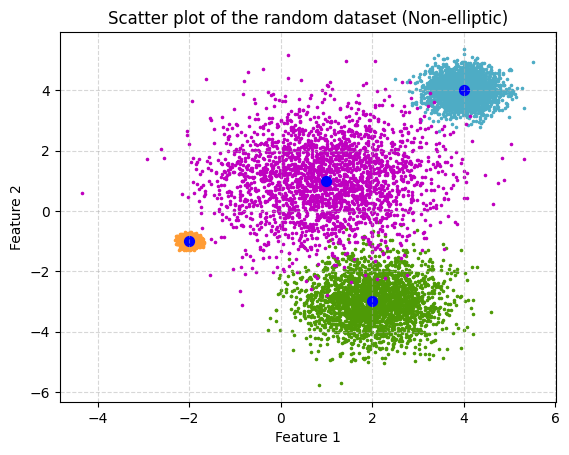

In [40]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_Nelliptic_true == k
    plt.scatter(X_Nelliptic[cluster_data, 0], X_Nelliptic[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(Centers_Nelliptic_true[:, 0], Centers_Nelliptic_true[:, 1], c="b", s=50)
plt.title("Scatter plot of the random dataset (Non-elliptic)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

['#FF9C34', '#4E9A06', 'm']


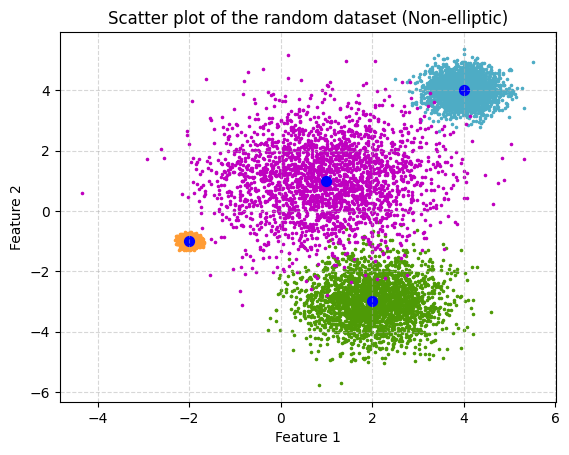

In [44]:
# What i can do
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

indexes = [1, 2, 3]
a = [colors[j] for j in indexes]
print(a)


# take y_nelleptical_true value == i
for i,item in enumerate(colors):
  indexes = [j for j in range(len(y_Nelliptic_true)) if y_Nelliptic_true[j] == i]
  # print(indexes)
  # all indexes where y_true value = 0 then 1,2,3
  # now plot these indexes as a point
  plt_X_array = [X_Nelliptic[i,0] for i in indexes ]
  plt_Y_array = [X_Nelliptic[i,1] for i in indexes]
  plt.scatter(plt_X_array, plt_Y_array, c=item, marker=".", s=10)
# centre
plt.scatter(Centers_Nelliptic_true[:, 0], Centers_Nelliptic_true[:, 1], c="b", s=50)
plt.title("Scatter plot of the random dataset (Non-elliptic)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Here we use generate the random dataset but in a ellipsodic form.<br> <br>
<b> <u> Inputs </u>: </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value is: 10000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value is: np.array([[4,4], [-2, -1], [2, -3], [1, 1]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value is: np.array([0.4, 0.1, 0.75, 1.2]) </li> </ul>
</ul>
<br>

<b> <u> Outputs </u>: </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul>
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>
<br>

<b> <u> Transfromation </u>: </b>
<ul>
 Value is: np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
</ul>
<br>

In [45]:
N_samples = 10000
Centers_elliptic_true = np.array([[4,4], [-2, -1], [2, -3], [1, 1]])
Stds = np.array([0.4, 0.1, 0.75, 1.2])
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
X_elliptic, y_elliptic_true = make_blobs(
    n_samples=N_samples, centers=Centers_elliptic_true, cluster_std=Stds, random_state=0
)
# This applies a linear transformation (rotation + scaling + shearing) to the dat
# To make elliptical data point we need transformnation using dot product
X_elliptic = np.dot(X_elliptic, transformation)  # Anisotropic blobs
Centers_elliptic_true = np.dot(Centers_elliptic_true, transformation)

Display the scatter plot of the randomly generated data (Elliptic).

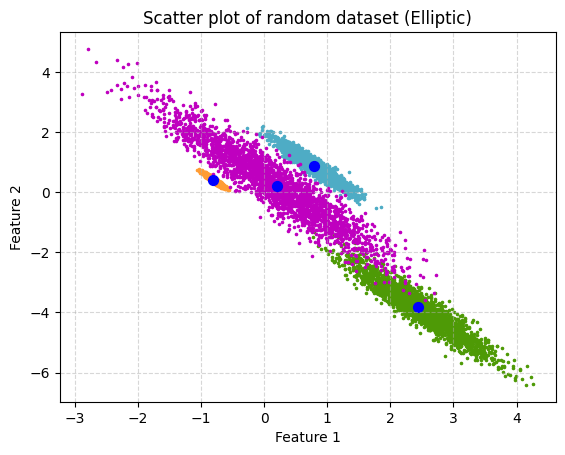

In [46]:
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_elliptic_true == k
    plt.scatter(X_elliptic[cluster_data, 0], X_elliptic[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(Centers_elliptic_true[:, 0], Centers_elliptic_true[:, 1], c="b", s=50)
plt.title("Scatter plot of random dataset (Elliptic)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Python Code Explanation
### Step3: Standarize the data so mapping of all data is comparable -> lets one point is [100000] and some points are close to [0] thats why standarize, but relative distance between data is kept  
### Before feeding to algorith machine leanring
### xi-means/std this is called z-score or standarized


   - **Why Standardization matters?**
     - **Comparability**: Features often have different units or scales (e.g., one feature ranges 0–1, another 0–1000). Without scaling, algorithms like K-Means and Agglomerative Clustering can be dominated by features with larger numerical ranges.
     - **Convergence**: Gradient-based and distance-based methods converge faster and more reliably when data is centered and scaled.
     - **Metric Consistency**: Standardization ensures that Euclidean distances (used in many clustering metrics) reflect relative differences in all features equally, avoiding bias toward high-variance features.

   - `from sklearn.preprocessing import StandardScaler`
     - Imports the `StandardScaler` class, which standardizes features by removing the mean and scaling to unit variance.

   - `scaler_Nelliptic = StandardScaler()`
     - Creates a `StandardScaler` instance for the non-elliptic dataset. This object will learn the mean and variance of `X_Nelliptic`.

   - `X_Nelliptic = scaler_Nelliptic.fit_transform(X_Nelliptic)`
     - **`fit_transform`** first **`fit`**s to `X_Nelliptic`, computing per-feature means and standard deviations, then **`transform`**s the data:
       - Subtracts each feature’s mean.
       - Divides by each feature’s standard deviation.
     - Result: `X_Nelliptic` has zero mean and unit variance per feature.

   - `Centers_Nelliptic = scaler_Nelliptic.transform(Centers_Nelliptic_true)`
     - Applies the same scaling parameters (mean & variance) learned from `X_Nelliptic` to the original cluster centers `Centers_Nelliptic_true`, yielding `Centers_Nelliptic` in the scaled feature space.

   - `scaler_elliptic = StandardScaler()`
     - Creates a separate `StandardScaler` instance for the elliptic dataset, ensuring its scaling parameters are learned independently.

   - `X_elliptic  = scaler_elliptic.fit_transform(X_elliptic)`
     - Fits the scaler to `X_elliptic` (learning its mean & variance) and transforms it so that each feature has zero mean and unit variance, stored in `X_elliptic`.

   - `Centers_elliptic = scaler_elliptic.transform(Centers_elliptic_true)`
     - Transforms the elliptic cluster centers `Centers_elliptic_true` using the scaling parameters from the elliptic data, producing `Centers_elliptic` aligned with `X_elliptic`.


In [47]:
# Scale Non-elliptic dataset and its centers
scaler_Nelliptic = StandardScaler()
X_Nelliptic       = scaler_Nelliptic.fit_transform(X_Nelliptic)
Centers_Nelliptic_true = scaler_Nelliptic.transform(Centers_Nelliptic_true)

# Scale Elliptic dataset and its centers
scaler_elliptic = StandardScaler()
X_elliptic      = scaler_elliptic.fit_transform(X_elliptic)
Centers_elliptic_true = scaler_elliptic.transform(Centers_elliptic_true)

Display the scatter plot of the standardized randomly generated data (Non-elliptic).

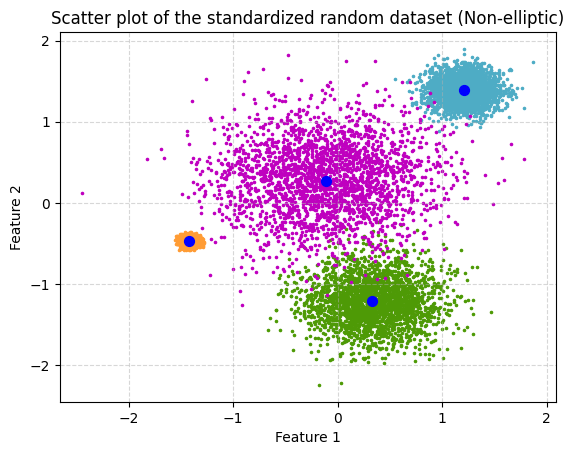

In [48]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_Nelliptic_true == k
    plt.scatter(X_Nelliptic[cluster_data, 0], X_Nelliptic[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(Centers_Nelliptic_true[:, 0], Centers_Nelliptic_true[:, 1], c="b", s=50)
plt.title("Scatter plot of the standardized random dataset (Non-elliptic)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Display the scatter plot of the standardized randomly generated data (elliptic).

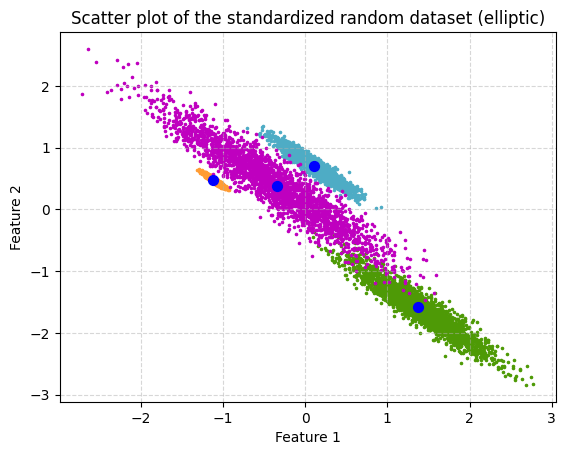

In [49]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_elliptic_true == k
    plt.scatter(X_elliptic[cluster_data, 0], X_elliptic[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(Centers_elliptic_true[:, 0], Centers_elliptic_true[:, 1], c="b", s=50)
plt.title("Scatter plot of the standardized random dataset (elliptic)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<h1 id="#Performance_metrics">Clustering Performance Metrics</h1>
In this session, we introduce some metrics that evaluate the performance of clustering algorithms.

<h2 id="#Cluster_purity">Cluster Purity</h2>

Cluster purity is a simple and intuitive metric used to evaluate the effectiveness of a clustering algorithm based on external criteria. It measures the extent to which clusters contain a single class of data, making it particularly useful when true class labels are available.

## Definition of Cluster Purity

Purity is a way to measure the accuracy of the clustering process by comparing cluster assignments with the ground truth class labels. Each cluster is assigned to the class which is most frequent in the cluster, and the accuracy of this assignment is measured to determine the purity of the cluster.

### Calculation of Purity

The calculation of cluster purity involves the following steps:

1. **Assignment of Class Labels**: For each cluster, assign the most frequent class label of the data points within the cluster. This is the label that occurs most often in each cluster.
2. **Count Correctly Classified Instances**: Count the number of data points in the cluster that belong to the class that has been assigned to that cluster.
3. **Compute Purity**: Divide the sum of correctly classified points by the total number of points.

The formula for purity is given by:

$$ \text{Purity}(\Omega, C) = \frac{1}{N} \sum_{k} \max_j | \omega_k \cap c_j | $$

Where:
- $ \Omega = \{\omega_1, \omega_2, \ldots, \omega_K\} $ is the set of clusters.
- $ C = \{c_1, c_2, \ldots, c_J\} $ is the set of classes.
- $ N $ is the total number of data points.
- $ |\omega_k \cap c_j| $ is the number of data points that are members of both cluster $ \omega_k $ and class $ c_j $.

### Interpretation of Purity

- **Value Range**: Purity ranges from 0 to 1, where 1 indicates perfect purity.
- **Limitations**: While purity is easy to understand and compute, it does not penalize the algorithm for creating too many clusters. If each data point is its own cluster, purity becomes 1, which may not be meaningful.

## Example

Consider a clustering scenario where there are 3 true classes, and a clustering algorithm partitions these into 4 clusters. Purity will measure how well each cluster represents a predominant class, based on the most frequent class label within each cluster.







Function "cluster_purity" gets true labels and assigns the labels by a clustering algorithm and outputs its cluster purity value.

<ul>
    <li> <b>Inputs</b>: </li>
    <ul>
        <li> true_labels: True labels of the dataset. </li>
        <li> predicted_labels: the assigned labels by a clustering algorithm.</li>
    </ul>
    <li> <b>Output</b>: </li>
    <ul>
        <li> Cluster purity value. </li>
    </ul>
</ul>

## Python Code Explanation
#### Step4: Calculate metrix for clusters : cluster purity(need access to true labels to compare)


#### 1. **Definition**:
   - `def cluster_purity(true_labels, predicted_labels):`
     - This function defines two parameters, `true_labels` and `predicted_labels`. These parameters are arrays where each element represents the true and predicted cluster assignments respectively for each data point.

#### 2. **Compute the Confusion Matrix**:
   - `cm = confusion_matrix(true_labels, predicted_labels)`
     - The function uses the `confusion_matrix` from Scikit-learn's `metrics` module to compute the confusion matrix `cm` between `true_labels` and `predicted_labels`.
     - The confusion matrix is a square matrix where the element at the i-th row and j-th column represents the number of elements of the true class i that are predicted to be in class j.

#### 3. **Sum Maximum Values in Each Column**:
   - `purity = np.sum(np.max(cm, axis=0)) / np.sum(cm)`
     - `np.max(cm, axis=0)`: This line finds the maximum value in each column of the confusion matrix. Each column represents the predicted clusters, and finding the maximum value in each column determines the most frequent true label in each predicted cluster.
     - `np.sum(np.max(cm, axis=0))`: Sums these maximum values, which represent the number of correctly clustered points under the assumption that each cluster is assigned to the most frequent true class it contains.
     - `np.sum(cm)`: Calculates the total number of samples.
     - The purity is then computed by dividing the sum of maximum values by the total number of samples. This gives the proportion of total data points that were classified into their most frequent class, reflecting the "purity" of the clusters.

#### 4. **Return Purity**:
   - `return purity`
     - The function returns the calculated purity value, which ranges from 0 to 1, where 1 indicates perfect purity where every cluster contains only members of a single class.


In [51]:
def cluster_purity(true_labels, predicted_labels):
    # Compute the confusion matrix between true and predicted labels
    cm = confusion_matrix(true_labels, predicted_labels)
    print ("True Labels Unique values: ",np.unique( true_labels))
    print(cm)
    # Sum the maximum values in each column of the confusion matrix
    # Each column of the confusion matrix represents a cluster
    # We take the maximum because we assign the cluster to the most frequent true class
    purity = np.sum(np.max(cm, axis=0)) / np.sum(cm)
    return purity

<h2 id="#Rand_index">Rand Index : Not focus for now</h2>

The Rand Index is a measure used to evaluate the similarity between two data clusterings. Originally proposed by William M. Rand, it is commonly used in statistics and machine learning to assess the agreement between two partitions: one from the clustering algorithm and the other being the ground truth classification.

## Definition of the Rand Index

The Rand Index (RI) quantifies the percentage of correct decisions made by the clustering algorithm by comparing every pair of samples and counting pairs that are either assigned to the same or different clusters in both the predicted and true clusters.

### Mathematical Formulation

The Rand Index is calculated as follows:

$$ \text{RI} = \frac{a + b} {a + b + c + d} $$

Where:
- $ a $ is the number of pairs of elements that are in the same set in both the predicted clusters and the true clusters.
- $ b $ is the number of pairs of elements that are in different sets in both the predicted clusters and the true clusters.
- $ c $ is the number of pairs of elements that are in the same set in the predicted clusters and in different sets in the true clusters.
- $ d $ is the number of pairs of elements that are in different sets in the predicted clusters and in the same set in the true clusters.

### Calculation Steps

1. Identify all pairs of elements in the dataset.
2. Classify each pair according to whether they are in the same or different clusters in both the predicted and true clusterings.
3. Compute the Rand Index using the formula.

### Interpretation of the Rand Index

- **Value Range**: The Rand Index ranges from 0 to 1, where 1 indicates perfect agreement between two clusterings.
- **Adjusted Rand Index**: To account for the chance grouping of elements, an adjusted version of the Rand Index, called the Adjusted Rand Index (ARI), is often used. This index adjusts for the expected similarity of all pair-wise comparisons between clusterings by chance.

## Example

Imagine a clustering scenario where you have a small dataset and two sets of clusters—one from a machine learning model and the other the true classification. The Rand Index would help quantify how similar these two sets of clusters are by evaluating all possible pairs of data points.


"scikit-learn" python library can calculate Rand Index using command "sklearn.metrics.rand_score(labels_true, labels_pred)".
<ul>
    <li> <b>Inputs</b>: </li>
    <ul>
        <li> labels_ture:  True labels of the dataset. </li>
        <li> labels_pred: The assigned labels by a clustering algorithm.</li>
    </ul>
    <li> <b>Output</b>: </li>
    <ul>
        <li> Rand index. </li>
    </ul>
</ul>

In [ ]:
sklearn.metrics.rand_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

<h2 id="#Silhouette_coefficient">Silhouette coefficient : This doesn't need labeled true labels</h2>

The Silhouette Coefficient is a metric used to evaluate the quality of a clustering algorithm. It measures how similar an object is to its own cluster compared to other clusters. The Silhouette Coefficient provides a succinct graphical representation of how well each object has been classified.

## Definition of the Silhouette Coefficient

The Silhouette Coefficient for a single sample is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The formula is as follows:

$$ s = \frac{b - a}{\max(a, b)} $$

Where:
- $ a $ is the average distance between a sample and all other points in the same cluster.
- $ b $ is the average distance between a sample and all other points in the nearest cluster that the sample is not a part of.

### Calculation Steps

1. **Compute the mean intra-cluster distance (a) for each sample**: Measure the distance between each sample and all other points in the same cluster, then compute the average.
2. **Calculate the mean nearest-cluster distance (b) for each sample**: Determine the smallest average distance of the sample to all points in any other cluster, of which the sample is not a member.
3. **Compute the Silhouette Coefficient for each sample**: Use the formula provided to calculate the Silhouette score for each sample individually. The score ranges from -1 to 1.
4. **Average the score across all samples to find the overall score**.

### Interpretation of the Silhouette Coefficient

- **Value Range**: The coefficient can range from -1 to 1.
  - A value of 1 indicates that the sample is far away from the neighboring cluster.
  - A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
  - A value of -1 indicates that the sample has been assigned to the wrong cluster.

### Uses of the Silhouette Coefficient

The Silhouette Coefficient is particularly useful for determining:
- **Cluster Cohesion and Separation**: It provides insight into the degree to which data points are appropriately grouped.
- **Optimal Number of Clusters**: By calculating the Silhouette Coefficient for several values of k, you can plot these scores to determine the best number of clusters in a dataset.

## Example

Consider using the Silhouette Coefficient in a clustering analysis where you have already applied a clustering algorithm like K-Means or Hierarchical Clustering to a dataset. You can compute the Silhouette Coefficient to judge if the clusters are well-formed and distinct.



"scikit-learn" python library can calculate Silhouette coefficient using command "sklearn.metrics.silhouette_score(X, labels_pred, metric='euclidean')".

<ul>
    <li> <b>Inputs</b>: </li>
    <ul>
        <li> X: The input dataset. </li>
        <li> labels: The assigned labels by a clustering algorithm.</li>
        <li> metric: The metric to use when calculating distance between instances in a feature array. If metric is a string, it must be one of the options allowed by pairwise_distances. If X is the distance array itself, use metric="precomputed". It is 'euclidean' be default.</li>
    </ul>
    <li> <b>Output</b>: </li>
    <ul>
        <li> Silhouette coefficient. </li>
    </ul>
</ul>

In [ ]:
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
sklearn.metrics.silhouette_score(X, kmeans.fit_predict(X))
# X real data without label and 2nd predicted data by kmeans

0.496137786540463

<h1 id="#K_means">K-Means Algorithm</h1>

### Step5: Now data ready: Feed to algorithm : Sklearn libraries -> Clustering, Regression, Classification

#### This Kmeans algo takes all data points return cluster number for each data point, centres of all clusters, inertia(used for elbow method)

Now that we have our random data, we can set up our K-Means Clustering. First of all, let's have a look into K-means and K-means++ algorithms.

<h2 id="#K-Means_understanding">Understanding K-Means and K-Means++ Algorithms</h2>

The K-Means and K-Means++ algorithms are popular clustering techniques used in data mining and machine learning to partition a dataset into K distinct, non-overlapping clusters. K-Means is known for its simplicity and efficiency, while K-Means++ offers an enhancement over the initialization phase of K-Means.

## K-Means Algorithm

K-Means is an iterative algorithm that divides a group of data points into K clusters by minimizing the sum of squares of distances between data and the corresponding cluster centroid. The steps involved in the K-Means algorithm are:

1. **Initialization**: Randomly pick `K` data points as the initial centroids.
2. **Assignment**: Assign each data point to the closest centroid. The closeness is measured by the Euclidean distance between the data point and the centroid.
3. **Update**: Recompute the centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids do not change or the changes are below a certain threshold, or a maximum number of iterations is reached.

### Objective Function

The objective of K-Means is to minimize the total intra-cluster variance, or, the squared error function:

$$ J = \sum_{i=1}^{k} \sum_{x \in S_i} \| x - \mu_i \|^2 $$

Where:
- $ \mu_i $ is the centroid of points in $ S_i $.
- $ x $ are the data points in cluster $ S_i $.

## K-Means++ Algorithm

K-Means++ improves the initialization step of the K-Means algorithm, which can significantly influence the final results. The improved initialization increases the probability of converging to a better local optimum.

### Initialization Steps in K-Means++

1. Choose one center uniformly at random from among the data points.
2. For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to $D(x)^2$.
4. Repeat Steps 2 and 3 until k centers have been chosen.
5. Now that the initial centers are chosen, proceed using standard K-Means clustering.

This initialization method spreads out the initial centroids before proceeding with the standard iterative algorithm, leading to improved clustering results and often faster convergence.



<h2 id="#K-Means_setting_up">Setting up K-Means</h2>
The KMeans class has many parameters that can be used, but we will use these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value is: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value is: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value is: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>. Since we want to evaluate K-means algorithm performance for two types of datasets, we will create two output parameter.

## Python Code Explanation


#### 1. **Creating KMeans Objects**:
   - `k_means_Nelliptic = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)`
   - `k_means_elliptic = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)`
     - Two `KMeans` instances are created, one for each dataset. Both instances use the "k-means++" method for initialization, which helps in selecting initial cluster centers for k-means clustering in a smart way to speed up convergence.
     - `n_clusters=4`: Specifies the number of clusters to form as 4.
     - `n_init=12`: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

#### 2. **Fitting the Model**:
   - `k_means_Nelliptic.fit(X_Nelliptic)`
   - `k_means_elliptic.fit(X_elliptic)`
     - These lines fit the KMeans algorithm to the datasets `X_Nelliptic` and `X_elliptic`. The `fit` method computes k-means clustering, assigning each data point to the nearest cluster.

### Retrieving Cluster Labels

- **Extracting Labels**:
  - `k_means_labels_Nelliptic = k_means_Nelliptic.labels_`
  - `k_means_labels_elliptic = k_means_elliptic.labels_`
    - After fitting the model, the labels of the clusters assigned to each point are retrieved using `.labels_` attribute of the KMeans object.
    - The labels are then printed to display which cluster each point belongs to in both datasets.

### Retrieving Cluster Centers

- **Cluster Centers**:
  - `k_means_cluster_centers_Nelliptic = k_means_Nelliptic.cluster_centers_`
  - `k_means_cluster_centers_elliptic = k_means_elliptic.cluster_centers_`
    - The coordinates of the cluster centers are retrieved using the `.cluster_centers_` attribute.
    - These coordinates are crucial for understanding the location of clusters formed in the feature space of the dataset.
    - The centers are printed to show where the centroids of the clusters are located.



In [52]:
# Initialize library kmeans++ best : n_init -> number of iteration

k_means_Nelliptic = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means_elliptic = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

#Now let's fit the KMeans algorithms with the feature matrices we created above,  X_Nelliptic  and X_elliptic .
k_means_Nelliptic.fit(X_Nelliptic)
k_means_elliptic.fit(X_elliptic)

#Now let's grab the labels for each point in the model using KMeans'  .labels\_  attribute and save it as  k_means_labels
k_means_labels_Nelliptic = k_means_Nelliptic.labels_
print("k-means assigned labels (Non-Elliptic Dataset): ", k_means_labels_Nelliptic)
k_means_labels_elliptic = k_means_elliptic.labels_
print("k-means assigned labels (Elliptic Dataset): ", k_means_labels_elliptic)

# return cluster number for each data point, centres of all clusters,
#We will also get the coordinates of the cluster centers using KMeans'  .cluster&#95;centers&#95;  and save it as  k_means_cluster_centers
k_means_cluster_centers_Nelliptic = k_means_Nelliptic.cluster_centers_
print("k-means assigned cluster centers (Non-Elliptic Dataset): ")
print(k_means_cluster_centers_Nelliptic)
k_means_cluster_centers_elliptic = k_means_elliptic.cluster_centers_
print("k-means assigned cluster centers (Elliptic Dataset): ")
print(k_means_cluster_centers_elliptic)

# centres returned are standarized

k-means assigned labels (Non-Elliptic Dataset):  [0 0 0 ... 2 1 1]
k-means assigned labels (Elliptic Dataset):  [2 2 2 ... 0 1 2]
k-means assigned cluster centers (Non-Elliptic Dataset): 
[[ 1.18569596  1.3630509 ]
 [-0.10336616  0.34196488]
 [-1.38911651 -0.44151372]
 [ 0.33492854 -1.19327797]]
k-means assigned cluster centers (Elliptic Dataset): 
[[-1.08723029  0.62471435]
 [ 0.8826496  -1.03492813]
 [ 0.04295045  0.53350052]
 [ 1.62394757 -1.81382166]]


<h2 id="#K-Means_visualization">K-Means Results Visualization</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

## Python Code Explanation

#### 1. **Initialize Plot Figures**:
   - `fig_Nelliptic = plt.figure(figsize=(6, 4))`
   - `fig_elliptic = plt.figure(figsize=(6, 4))`
     - Two figure objects are created for plotting: `fig_Nelliptic` for the Non-Elliptic dataset and `fig_elliptic` for the Elliptic dataset. Each figure has a specified size of 6 inches by 4 inches.

#### 2. **Setup Color Scheme**:
   - `colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]`
     - A list of colors is defined to distinguish different clusters visually. Each cluster will be represented by one of these colors.

#### 3. **Create Subplots**:
   - `ax_Nelliptic = fig_Nelliptic.add_subplot(1, 1, 1)`
   - `ax_elliptic = fig_elliptic.add_subplot(1, 1, 1)`
     - Subplots are added to the previously defined figure objects. Here, `1, 1, 1` indicates a single subplot grid.

#### 4. **Plotting Data Points and Centroids**:
   - Using a loop, the code plots both the data points and the centroids for each cluster in both datasets:
     - **For Loop**: Runs for each cluster (0 to number of colors - 1).
     - **Members of Each Cluster**:
       - `my_members_Nelliptic = (k_means_labels_Nelliptic == k)`
       - `my_members_elliptic = (k_means_labels_elliptic == k)`
         - These lines identify the data points belonging to each cluster by comparing the cluster labels to the loop index `k`.
     - **Centroids**:
       - `cluster_center_Nelliptic = k_means_cluster_centers_Nelliptic[k]`
       - `cluster_center_elliptic = k_means_cluster_centers_elliptic[k]`
         - These lines retrieve the centroid coordinates for each cluster.
     - **Plot Commands**:
       - Data points are plotted with a white edge (`'w'`) and a face color specific to their cluster.
       - Centroids are plotted as larger dots with a black edge to distinguish them clearly.

#### 5. **Customize and Title Plots**:
   - The titles are set for each subplot to indicate which dataset is being visualized.
   - X and Y axis ticks are removed to clean up the plot presentation.

#### 6. **Display the Plot**:
   - `plt.show()`
     - This function call displays the constructed plots.


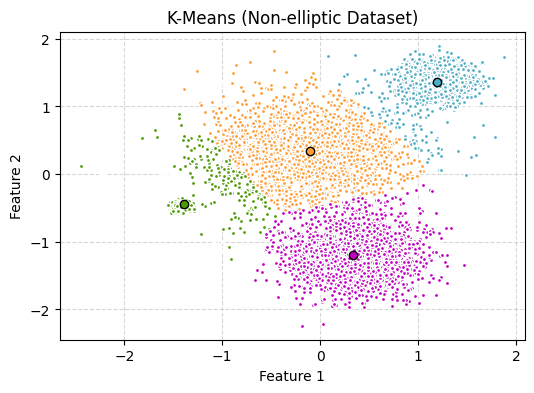

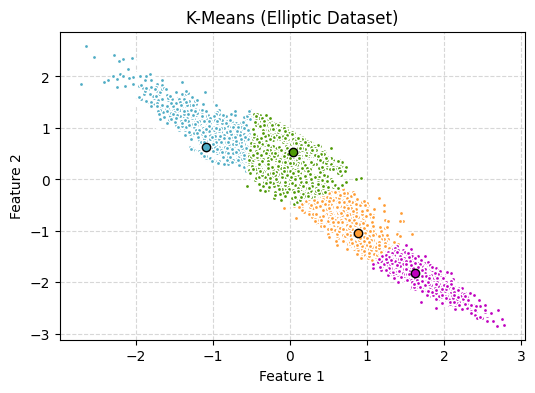

In [53]:
# Initialize the plot with the specified dimensions.
fig_Nelliptic = plt.figure(figsize=(6, 4))
fig_elliptic = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

# Create a plot
ax_Nelliptic = fig_Nelliptic.add_subplot(1, 1, 1)
ax_elliptic = fig_elliptic.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k in range(len(colors)):

    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.

    # same indexes find and used to capture that in diagram
    my_members_Nelliptic = (k_means_labels_Nelliptic == k)
    my_members_elliptic = (k_means_labels_elliptic == k)

    # Define the centroid, or cluster center.
    # Using the kmeans algo resut
    cluster_center_Nelliptic = k_means_cluster_centers_Nelliptic[k]
    cluster_center_elliptic = k_means_cluster_centers_elliptic[k]

    # Plots the datapoints with color col.
    ax_Nelliptic.plot(X_Nelliptic[my_members_Nelliptic, 0], X_Nelliptic[my_members_Nelliptic, 1], 'w', markerfacecolor=colors[k], marker='.')
    ax_elliptic.plot(X_elliptic[my_members_elliptic, 0], X_elliptic[my_members_elliptic, 1], 'w', markerfacecolor=colors[k], marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax_Nelliptic.plot(cluster_center_Nelliptic[0], cluster_center_Nelliptic[1], 'o', markerfacecolor=colors[k],  markeredgecolor='k', markersize=6)
    ax_elliptic.plot(cluster_center_elliptic[0], cluster_center_elliptic[1], 'o', markerfacecolor=colors[k],  markeredgecolor='k', markersize=6)

# Title of the plot
ax_Nelliptic.set_title('K-Means (Non-elliptic Dataset)')
ax_elliptic.set_title('K-Means (Elliptic Dataset)')



ax_Nelliptic.set_xlabel("Feature 1")
ax_Nelliptic.set_ylabel("Feature 2")
ax_Nelliptic.grid(True, linestyle="--", alpha=0.5)

ax_elliptic.set_xlabel("Feature 1")
ax_elliptic.set_ylabel("Feature 2")
ax_elliptic.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


<h2 id="#K-Means_evaluation">K-Means Performance Evaluation</h2>

### Step4: Performance Evalutation

Now, we can evaluate the performance of K-means algorithm based on the performance metrics.

In [55]:
def cluster_purity(true_labels, predicted_labels):
    # Compute the confusion matrix between true and predicted labels
    cm = confusion_matrix(true_labels, predicted_labels)
    print ("True Labels Unique values: ",np.unique( true_labels))
    print(cm)
    # Sum the maximum values in each column of the confusion matrix
    # Each column of the confusion matrix represents a cluster
    # We take the maximum because we assign the cluster to the most frequent true class

    # Output: array([2500, 2099, 2500, 2493])
    # np.max(cm, axis=0)
    # each column maximum
    purity = np.sum(np.max(cm, axis=0)) / np.sum(cm)
    return purity

In [54]:
# purity need ytrue label and predicted
Purity_Nelliptic = cluster_purity(y_Nelliptic_true, k_means_labels_Nelliptic)
Purity_elliptic = cluster_purity(y_elliptic_true, k_means_labels_elliptic)
Rand_Index_Nelliptic = sklearn.metrics.rand_score(y_Nelliptic_true, k_means_labels_Nelliptic)
Rand_Index_elliptic = sklearn.metrics.rand_score(y_elliptic_true, k_means_labels_elliptic)

# data set and predicted labels argument takes
Silhouette_coefficient_Nelliptic = sklearn.metrics.silhouette_score(X_Nelliptic, k_means_labels_Nelliptic, metric='euclidean')
Silhouette_coefficient_elliptic = sklearn.metrics.silhouette_score(X_elliptic, k_means_labels_elliptic, metric='euclidean')


print('Purity (Non-elliptic): '+str(Purity_Nelliptic), 'Purity (Elliptic): '+str(Purity_elliptic))
print('Rand index (Non-elliptic): '+str(Rand_Index_Nelliptic), 'Rand index (Elliptic): '+str(Rand_Index_elliptic))
print('Silhouette coefficient (Non-elliptic): '+str(Silhouette_coefficient_Nelliptic), 'Silhouette coefficient (Elliptic): '+str(Silhouette_coefficient_elliptic))

True Labels Unique values:  [0 1 2 3]
[[2500    0    0    0]
 [   0    0 2500    0]
 [   0    7    0 2493]
 [ 110 2099  195   96]]
True Labels Unique values:  [0 1 2 3]
[[  10    0 2490    0]
 [2500    0    0    0]
 [   0  874    2 1624]
 [1015  302 1181    2]]
Purity (Non-elliptic): 0.9592 Purity (Elliptic): 0.7488
Rand index (Non-elliptic): 0.9614681268126812 Rand index (Elliptic): 0.8179007300730073
Silhouette coefficient (Non-elliptic): 0.7018827249722124 Silhouette coefficient (Elliptic): 0.5806979525800787


In [57]:
# since our true values are fixed by make_blobs
# but kmeans dont know the label so assign it themselves
# so better to take maximum from each column it can happen true was 0 but predicted 1(it is a cluster)

# cm =
# [[2500    0    0    0]   # True label 0
#  [   0    0 2500    0]   # True label 1
#  [   0    7    0 2493]   # True label 2
#  [ 110 2099  195   96]]  # True label 3

# cm[0,0] = 2500 → 2500 points that truly belong to cluster 0 were predicted as cluster 0

# cm[1,2] = 2500 → 2500 points that truly belong to cluster 1 were predicted as cluster 2

# cm[3,1] = 2099 → 2099 points that truly belong to cluster 3 were predicted as cluster 1

<h2 id="#K-Means_elbow">Elbow Method for Optimal K in K-Means</h2>

The Elbow Method is a popular technique to determine the optimal number of clusters (K) for K-Means clustering. It works by running K-Means clustering on the dataset for a range of K values and plotting the sum of squared distances (inertia) for each K. The "elbow" point in the plot indicates the optimal K, where adding more clusters does not significantly improve the fit.

**Steps:**
1. Fit K-Means for a range of K values (e.g., 1 to 10).
2. Record the inertia (sum of squared distances to the nearest cluster center) for each K.
3. Plot inertia vs. K and look for the "elbow" point.

We will apply the Elbow Method both of the datasets.


## Python Code Explanation


This code implements the **Elbow Method** to help determine the optimal number of clusters (K) for K-Means clustering, both on the original and PCA-reduced datasets.

#### 1. **Initialization of Lists**
- `inertias_Nelliptic`, `inertias_elliptic`:
  - These lists will store the inertia (sum of squared distances to the nearest cluster center) for each value of K for the respective datasets.

#### 2. **Range of K**
- `K_range = range(1, 11)`:
  - Sets the range of K values to test, from 1 to 10 clusters.

#### 3. **Loop Over K Values**
- For each value of `k` in `K_range`:
  - Four KMeans models are fitted:
    - `kmeans_N`: KMeans on the original Non-elliptic dataset.
    - `kmeans_E`: KMeans on the original Elliptic dataset.
  - All use `init='k-means++'`, `n_init=12`, and a fixed `random_state` for reproducibility.
  - The inertia (within-cluster sum of squares) for each model is appended to the corresponding list.

#### 4. **Plotting the Results**
- A figure with two subplots is created:
  - **Left subplot:** Inertia vs. K for Non-elliptic data.
  - **Right subplot:** Inertia vs. K for Elliptic data.
- The "elbow" point (where the decrease in inertia slows down) suggests the optimal number of clusters.

#### 5. **Interpretation**
- The Elbow Method helps visually identify the best K by looking for a "knee" in the plot, where adding more clusters yields diminishing returns

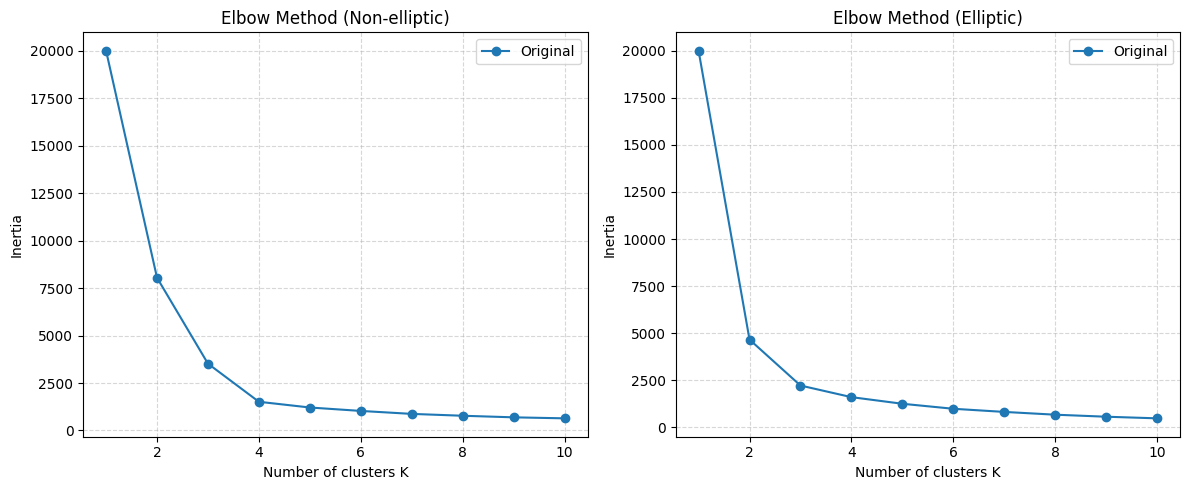

In [58]:
# Elbow Method for K-Means (Original and PCA-reduced data)
inertias_Nelliptic = []
inertias_elliptic = []
K_range = range(1, 11)

# Data point pe Kmeans algo use and get intertia for particular k

for k in K_range:
    kmeans_N = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=0).fit(X_Nelliptic)
    kmeans_E = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=0).fit(X_elliptic)
    inertias_Nelliptic.append(kmeans_N.inertia_)
    inertias_elliptic.append(kmeans_E.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias_Nelliptic, 'o-', label='Original')
plt.title('Elbow Method (Non-elliptic)')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(K_range, inertias_elliptic, 'o-', label='Original')
plt.title('Elbow Method (Elliptic)')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Interpretation: you can see a clear “knee” in the curve at **k = 4**. After k = 4, the marginal gain in lowering inertia becomes much smaller, indicating that **4 clusters** is the optimal choice.



<h1 id="#Agglomerative">Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkage)</h1>
At the begining, let's have a look Agglomerative hierarchical clustering algorithm (Single Linkage, Complete Linkage).

<h2 id="#Agglomerative_understanding">Understanding Agglomerative Hierarchical Algorithm (Single Linkage, Complete Linkage)</h2>


Agglomerative hierarchical clustering is a bottom-up clustering method where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

### Steps:

1. **Initialization**: Start by assigning each data point to its own cluster.
2. **Compute the Distance Matrix**: Calculate the proximity matrix between all clusters.
3. **Merge Clusters**: Find and merge the two closest clusters.
4. **Update the Distance Matrix**: Recalculate distances between the new cluster and the original clusters.
5. **Repeat**: Continue the process until all data points are clustered into a single cluster.

### Types of Linkage:

#### Single Linkage (MIN)

- **Definition**: The distance between two clusters is defined as the shortest distance between points in the two clusters.
- **Formula**: If $ C_i $ and $ C_j $ are two clusters, then:
  
  $ d(C_i, C_j) = \min \{d(x, y) | x \in C_i, y \in C_j\} $
  
- **Characteristics**:
  - Tends to create clusters that can be described as 'chains'.
  - Can handle non-elliptical shapes.
  - Susceptible to noise and outliers.

#### Complete Linkage (MAX)

- **Definition**: The distance between two clusters is defined as the longest distance between points in the two clusters.
- **Formula**: If $ C_i $ and $ C_j $ are two clusters, then:
  
 $ d(C_i, C_j) = \max \{d(x, y) | x \in C_i, y \in C_j\} $
  
- **Characteristics**:
  - Tends to produce more compact and clearly defined clusters.
  - Less susceptible to noise and outliers compared to single linkage.
  - Can be biased towards spherical clusters.

### Choosing Linkage Criteria:

The choice of linkage method affects the shape and size of clusters formed. Single linkage is more sensitive to outliers, leading to elongated clusters, whereas complete linkage generally results in more uniform and compact clusters.




<h2 id="#Agglomerative_setting_up">Setting up Agglomerative Algorithm (Single Linkage, Complete Linkage)</h2>
The AgglomerativeClustering class has many parameters that can be used, but we will use these two:
<ul>
        <li> <b>n_clusters</b>: The number of clusters to find. </li>
        <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

        - ‘ward’ minimizes the variance of the clusters being merged.

        - ‘average’ uses the average of the distances of each observation of the two sets.

        - ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

        - ‘single’ uses the minimum of the distances between all observations of the two sets. </li>

        In this Lab we will just use 'single' and 'complete' modes.
</ul>

#### To build a cluster -> single cluster theoritical padhe ho dmin(x,y) wala type now if you want 4 clusters tell the algo

In [ ]:
# Initialize class -> Feed the data -> Get predicted labels
Agglomerative_Single_Nelliptic = AgglomerativeClustering(n_clusters = 4, linkage='single').fit(X_Nelliptic)
Agglomerative_Single_elliptic = AgglomerativeClustering(n_clusters = 4, linkage='single').fit(X_elliptic)
Agglomerative_Complete_Nelliptic = AgglomerativeClustering(n_clusters = 4, linkage='complete').fit(X_Nelliptic)
Agglomerative_Complete_elliptic = AgglomerativeClustering(n_clusters = 4, linkage='complete').fit(X_elliptic)
Agglomerative_Single_labels_Nelliptic = Agglomerative_Single_Nelliptic.labels_
Agglomerative_Singlelabels_elliptic = Agglomerative_Single_elliptic.labels_
Agglomerative_Complete_labels_Nelliptic = Agglomerative_Complete_Nelliptic.labels_
Agglomerative_Complete_labels_elliptic = Agglomerative_Complete_elliptic.labels_

Agglomerative_Single_labels_Nelliptic = Agglomerative_Single_Nelliptic.labels_
print("Agglomerative Single assigned labels (Non-Elliptic Dataset): ", Agglomerative_Single_labels_Nelliptic)
Agglomerative_Single_labels_elliptic = Agglomerative_Single_elliptic.labels_
print("Agglomerative Single assigned labels (Elliptic Dataset): ", Agglomerative_Single_labels_elliptic)

Agglomerative_Complete_labels_Nelliptic = Agglomerative_Complete_Nelliptic.labels_
print("Agglomerative Complete assigned labels (Non-Elliptic Dataset): ", Agglomerative_Complete_labels_Nelliptic)
Agglomerative_Complete_labels_elliptic = Agglomerative_Complete_elliptic.labels_
print("Agglomerative Complete assigned labels (Elliptic Dataset): ", Agglomerative_Complete_labels_elliptic)


Agglomerative Single assigned labels (Non-Elliptic Dataset):  [0 0 0 ... 0 0 0]
Agglomerative Single assigned labels (Elliptic Dataset):  [0 0 0 ... 0 0 0]
Agglomerative Complete assigned labels (Non-Elliptic Dataset):  [3 3 3 ... 2 0 1]
Agglomerative Complete assigned labels (Elliptic Dataset):  [1 1 1 ... 1 3 1]


<h2 id="#Agglomerative_visualization">Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkagee) Performance Visualization</h2>
So now the Agglomerative hierarchical clustering model initialized, let's plot the results and see what it looks like!

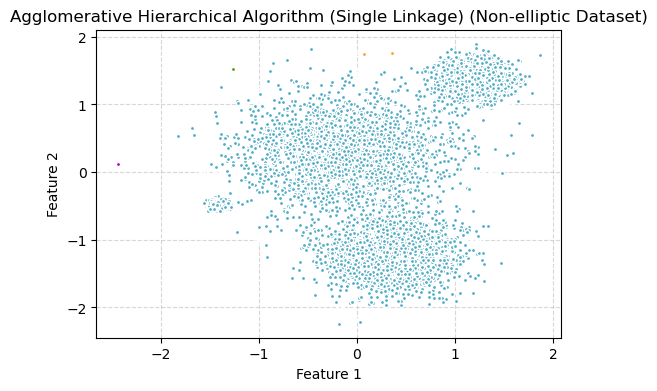

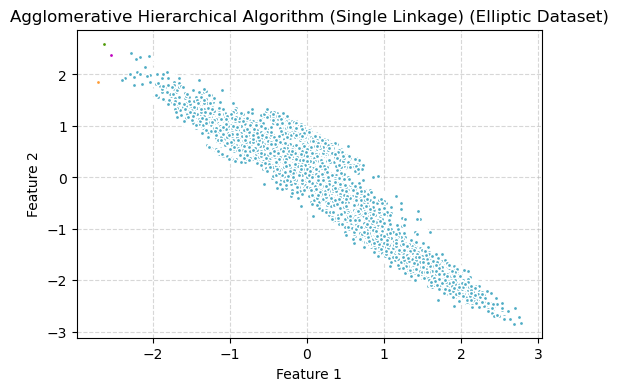

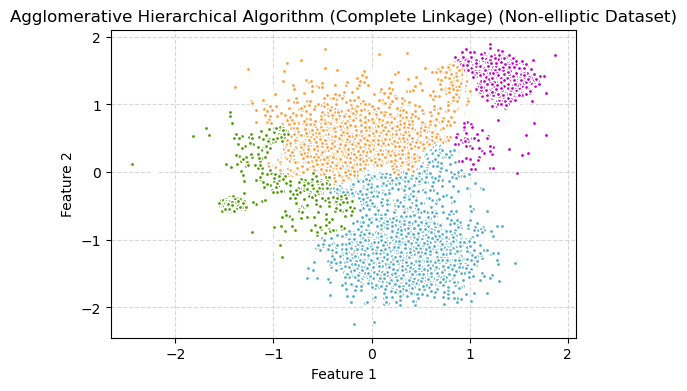

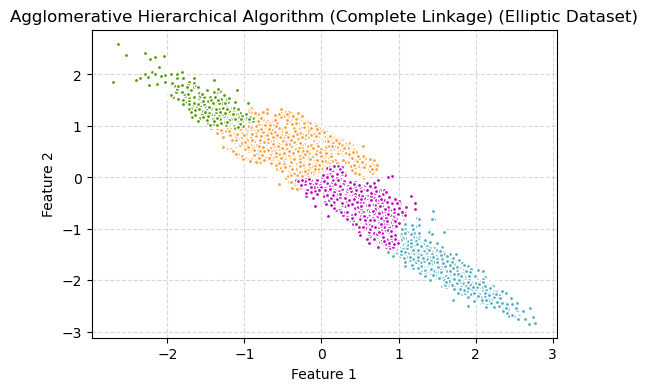

In [ ]:
# Initialize the plot with the specified dimensions.
fig_Single_Nelliptic = plt.figure(figsize=(6, 4))
fig_Single_elliptic = plt.figure(figsize=(6, 4))
fig_Complete_Nelliptic = plt.figure(figsize=(6, 4))
fig_Complete_elliptic = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

# Create a plot
ax_Single_Nelliptic = fig_Single_Nelliptic.add_subplot(1, 1, 1)
ax_Single_elliptic = fig_Single_elliptic.add_subplot(1, 1, 1)
ax_Complete_Nelliptic = fig_Complete_Nelliptic.add_subplot(1, 1, 1)
ax_Complete_elliptic = fig_Complete_elliptic.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k in range(len(colors)):

    # Create a list of all data points, where the data poitns that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members_Single_Nelliptic = (Agglomerative_Single_labels_Nelliptic == k)
    my_members_Single_elliptic = (Agglomerative_Single_labels_elliptic == k)
    my_members_Complete_Nelliptic = (Agglomerative_Complete_labels_Nelliptic == k)
    my_members_Complete_elliptic = (Agglomerative_Complete_labels_elliptic == k)


    # Plots the datapoints with color col.
    ax_Single_Nelliptic.plot(X_Nelliptic[my_members_Single_Nelliptic, 0], X_Nelliptic[my_members_Single_Nelliptic, 1], 'w', markerfacecolor=colors[k], marker='.')
    ax_Single_elliptic.plot(X_elliptic[my_members_Single_elliptic, 0], X_elliptic[my_members_Single_elliptic, 1], 'w', markerfacecolor=colors[k], marker='.')
    ax_Complete_Nelliptic.plot(X_Nelliptic[my_members_Complete_Nelliptic, 0], X_Nelliptic[my_members_Complete_Nelliptic, 1], 'w', markerfacecolor=colors[k], marker='.')
    ax_Complete_elliptic.plot(X_elliptic[my_members_Complete_elliptic, 0], X_elliptic[my_members_Complete_elliptic, 1], 'w', markerfacecolor=colors[k], marker='.')


# Title of the plot
ax_Single_Nelliptic.set_title('Agglomerative Hierarchical Algorithm (Single Linkage) (Non-elliptic Dataset)')
ax_Single_elliptic.set_title('Agglomerative Hierarchical Algorithm (Single Linkage) (Elliptic Dataset)')
ax_Complete_Nelliptic.set_title('Agglomerative Hierarchical Algorithm (Complete Linkage) (Non-elliptic Dataset)')
ax_Complete_elliptic.set_title('Agglomerative Hierarchical Algorithm (Complete Linkage) (Elliptic Dataset)')



ax_Single_Nelliptic.set_xlabel("Feature 1")
ax_Single_Nelliptic.set_ylabel("Feature 2")
ax_Single_Nelliptic.grid(True, linestyle="--", alpha=0.5)

ax_Single_elliptic.set_xlabel("Feature 1")
ax_Single_elliptic.set_ylabel("Feature 2")
ax_Single_elliptic.grid(True, linestyle="--", alpha=0.5)

ax_Complete_Nelliptic.set_xlabel("Feature 1")
ax_Complete_Nelliptic.set_ylabel("Feature 2")
ax_Complete_Nelliptic.grid(True, linestyle="--", alpha=0.5)

ax_Complete_elliptic.set_xlabel("Feature 1")
ax_Complete_elliptic.set_ylabel("Feature 2")
ax_Complete_elliptic.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


<h2 id="#Agglomerative_evaluation">Agglomerative Hierarchical Clustering Algorithm (Single Linkage, Complete Linkage) Performance Evaluation</h2>
Now, we can evaluate the performance of K-Agglomerative hierarchical clustering algorithm  based on the performance metrics.

In [ ]:
# need predicted and true values both
Purity_Single_Nelliptic = cluster_purity(y_Nelliptic_true, Agglomerative_Single_labels_Nelliptic)
Purity_Single_elliptic = cluster_purity(y_elliptic_true, Agglomerative_Single_labels_elliptic)
Purity_Complete_Nelliptic = cluster_purity(y_Nelliptic_true, Agglomerative_Complete_labels_Nelliptic)
Purity_Complete_elliptic = cluster_purity(y_elliptic_true, Agglomerative_Complete_labels_elliptic)

# This need data and predicted no need of true
Silhouette_coefficient_Single_Nelliptic = sklearn.metrics.silhouette_score(X_Nelliptic, Agglomerative_Single_labels_Nelliptic, metric='euclidean')
Silhouette_coefficient_Single_elliptic = sklearn.metrics.silhouette_score(X_elliptic, Agglomerative_Single_labels_elliptic, metric='euclidean')
Silhouette_coefficient_Complete_Nelliptic = sklearn.metrics.silhouette_score(X_Nelliptic, Agglomerative_Complete_labels_Nelliptic, metric='euclidean')
Silhouette_coefficient_Complete_elliptic = sklearn.metrics.silhouette_score(X_elliptic, Agglomerative_Complete_labels_elliptic, metric='euclidean')


print('Purity (Single Linkage) (Non-elliptic): '+str(Purity_Single_Nelliptic), 'Purity (Single Linkage) (Elliptic): '+str(Purity_Single_elliptic))
print('Purity (Complete Linkage) (Non-elliptic): '+str(Purity_Complete_Nelliptic), 'Purity (Complete Linkage) (Elliptic): '+str(Purity_Complete_elliptic))
print('Silhouette coefficient (Single Linkage) (Non-elliptic): '+str(Silhouette_coefficient_Single_Nelliptic), 'Silhouette coefficient (Single Linkage) (Elliptic): '+str(Silhouette_coefficient_Single_elliptic))
print('Silhouette coefficient (Complete Linkage) (Non-elliptic): '+str(Silhouette_coefficient_Complete_Nelliptic), 'Silhouette coefficient (Complete Linkage) (Elliptic): '+str(Silhouette_coefficient_Complete_elliptic))

[[2500    0    0    0]
 [2500    0    0    0]
 [2500    0    0    0]
 [2496    2    1    1]]
[[2500    0    0    0]
 [2500    0    0    0]
 [2500    0    0    0]
 [2497    1    1    1]]
[[   0  481    0 2019]
 [   0    0 2500    0]
 [2489    0   11    0]
 [ 481 1670  293   56]]
[[   0 2498    0    2]
 [   0 2500    0    0]
 [2096    0    0  404]
 [  34 1433  376  657]]
Purity (Single Linkage) (Non-elliptic): 0.2504 Purity (Single Linkage) (Elliptic): 0.2503
Purity (Complete Linkage) (Non-elliptic): 0.8678 Purity (Complete Linkage) (Elliptic): 0.5629
Silhouette coefficient (Single Linkage) (Non-elliptic): -0.10145140403953648 Silhouette coefficient (Single Linkage) (Elliptic): 0.46957483381281945
Silhouette coefficient (Complete Linkage) (Non-elliptic): 0.5830389509814162 Silhouette coefficient (Complete Linkage) (Elliptic): 0.38353562932117063


<h1 id="#DBSCAN">DBSCAN Algorithm</h1>
At the begining, let's have a look DBSCAN algorithm.


<h2 id="#DBSCAN_understanding">Understanding DBSCAN Algorithm</h2>


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that is especially noted for its effectiveness in identifying clusters of varying shapes and sizes in a data set, while being robust against noise and outliers. This makes DBSCAN particularly useful in real-world data processing where the data may not be uniformly sampled.

DBSCAN stands apart from centroid-based clustering techniques like K-Means because it doesn’t require a predefined number of clusters. Instead, it uses the spatial density of data points to find clusters. It can identify clusters in large spatial datasets by looking at the local density of data points and grouping points that are closely packed together.


### Core Concepts of DBSCAN

DBSCAN involves two main parameters:
- **ε (epsilon)**: A distance measure that defines the neighborhood around a data point.
- **MinPts (minimum points)**: The minimum number of points required to form a dense region, which means that for a point to be considered a core point, it must have at least MinPts within its ε-neighborhood.

### Types of Points in DBSCAN

1. **Core Points**: A point is a core point if at least MinPts points are within distance ε (including the point itself).
2. **Border Points**: A border point has fewer than MinPts within distance ε but is in the neighborhood of a core point.
3. **Noise Points**: A noise point is any point that is not a core point or a border point.

### Algorithm Steps

1. Label all points as core, border, or noise points.
2. Eliminate noise points.
3. Put an edge between all core points that are within distance ε of each other.
4. Make each group of connected core points into a separate cluster.
5. Assign each border point to one of the clusters of its associated core points.


## Example Usage

DBSCAN is commonly applied in fields like anomaly detection, spatial data analysis, genetics, and image segmentation. It's particularly effective in scenarios where the clusters are not spherical or where noise can significantly affect the clustering results.



<h2 id="#DBSCAN_setting_up">Setting up DBSCAN</h2>
The BDSCAN class has many parameters that can be used, but we will use these two:
<ul>
        <li> <b>eps</b>: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function. </li>
        <li> <b>min_samples</b>: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse. </li>
</ul>

In [ ]:
db_Nelliptic = DBSCAN(eps=0.1, min_samples=25).fit(X_Nelliptic)
db_elliptic = DBSCAN(eps=0.1, min_samples=25).fit(X_elliptic)
DBSCAN_labels_Nelliptic = db_Nelliptic.labels_
DBSCAN_labels_elliptic = db_elliptic.labels_

# Number of clusters in labels, ignoring noise if present.
# set se unique values aayenge pure [] ka
n_clusters_Nelliptic = len(set(DBSCAN_labels_Nelliptic)) - (1 if -1 in DBSCAN_labels_Nelliptic else 0)
n_clusters_elliptic = len(set(DBSCAN_labels_elliptic)) - (1 if -1 in DBSCAN_labels_elliptic else 0)
n_noise_Nelliptic = list(DBSCAN_labels_Nelliptic).count(-1)
n_noise_elliptic = list(DBSCAN_labels_elliptic).count(-1)

print("Estimated number of clusters (Non-elliptic dataset): %d" % n_clusters_Nelliptic)
print("Estimated number of clusters (Elliptic dataset): %d" % n_clusters_elliptic)
print("Estimated number of noise points(Non-elliptic dataset): %d" % n_noise_Nelliptic)
print("Estimated number of noise points (Elliptic dataset): %d" % n_noise_elliptic)

# Here this algo says 10%(1000/10000) data is noise data is gold to us

Estimated number of clusters (Non-elliptic dataset): 4
Estimated number of clusters (Elliptic dataset): 4
Estimated number of noise points(Non-elliptic dataset): 939
Estimated number of noise points (Elliptic dataset): 348


<h2 id="#DBSCAN_visualization">DBSCAN Performance Visualization</h2>
So now the DBSCAN model initialized, let's plot the results and see what it looks like!

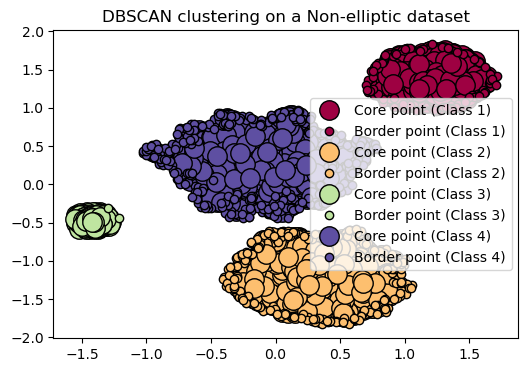

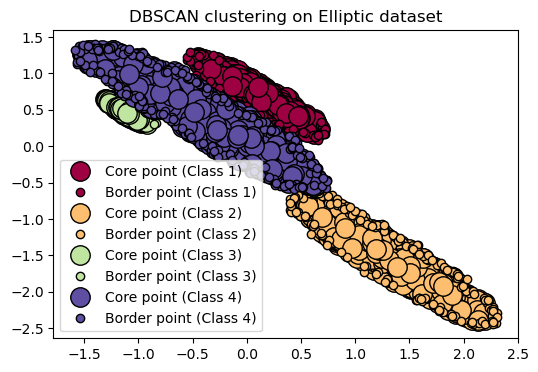

In [ ]:
unique_labels_Nelliptic = set(DBSCAN_labels_Nelliptic)
unique_labels_elliptic = set(DBSCAN_labels_elliptic)
core_samples_mask_Nelliptic = np.zeros_like(DBSCAN_labels_Nelliptic, dtype=bool)
core_samples_mask_elliptic = np.zeros_like(DBSCAN_labels_elliptic, dtype=bool)
core_samples_mask_Nelliptic[db_Nelliptic.core_sample_indices_] = True
core_samples_mask_elliptic[db_elliptic.core_sample_indices_] = True

fig_Nelliptic = plt.figure(figsize=(6, 4))
fig_elliptic = plt.figure(figsize=(6, 4))


# Create a plot
ax_Nelliptic = fig_Nelliptic.add_subplot(1, 1, 1)
ax_elliptic = fig_elliptic.add_subplot(1, 1, 1)

colors_Nelliptic = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_Nelliptic)-1)]
for k in range(len(colors_Nelliptic)):
    col_Nelliptic = colors_Nelliptic[k]
    if DBSCAN_labels_Nelliptic[k] == -1:
        # Black used for noise.
        col_Nelliptic = [0, 0, 0, 1]


    class_member_mask_Nelliptic = DBSCAN_labels_Nelliptic == k

    xy_Nelliptic = X_Nelliptic[class_member_mask_Nelliptic & core_samples_mask_Nelliptic]
    ax_Nelliptic.plot(
        xy_Nelliptic[:, 0],
        xy_Nelliptic[:, 1],
        "o",
        markerfacecolor=tuple(col_Nelliptic),
        markeredgecolor="k",
        markersize=14,
        label='Core point (Class %s)' %(k+1)

    )

    xy_Nelliptic = X_Nelliptic[class_member_mask_Nelliptic & ~core_samples_mask_Nelliptic]
    ax_Nelliptic.plot(
        xy_Nelliptic[:, 0],
        xy_Nelliptic[:, 1],
        "o",
        markerfacecolor=tuple(col_Nelliptic),
        markeredgecolor="k",
        markersize=6,
        label='Border point (Class %s)' %(k+1)
    )

colors_elliptic = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_elliptic)-1)]
for k in range(len(colors_elliptic)):
    col_elliptic = colors_elliptic[k]
    if DBSCAN_labels_elliptic[k] == -1:
        # Black used for noise.
        col_elliptic = [0, 0, 0, 1]

    class_member_mask_elliptic = DBSCAN_labels_elliptic == k

    xy_elliptic = X_elliptic[class_member_mask_elliptic & core_samples_mask_elliptic]
    ax_elliptic.plot(
        xy_elliptic[:, 0],
        xy_elliptic[:, 1],
        "o",
        markerfacecolor=tuple(col_elliptic),
        markeredgecolor="k",
        markersize=14,
        label='Core point (Class %s)' %(k+1)
    )

    xy_elliptic = X_elliptic[class_member_mask_elliptic & ~core_samples_mask_elliptic]
    ax_elliptic.plot(
        xy_elliptic[:, 0],
        xy_elliptic[:, 1],
        "o",
        markerfacecolor=tuple(col_elliptic),
        markeredgecolor="k",
        markersize=6,
        label='Border point (Class %s)' %(k+1)
    )

ax_Nelliptic.legend()
ax_elliptic.legend()
ax_Nelliptic.set_title('DBSCAN clustering on a Non-elliptic dataset')
ax_elliptic.set_title('DBSCAN clustering on Elliptic dataset')
plt.show()

<h2 id="#DBSCAN_evaluation">DBSCAN Performance Evaluation</h2>
Now, we can evaluate the performance of DBSCAN algorithm based on the performance metrics.

In [ ]:
Purity_Nelliptic = cluster_purity(y_Nelliptic_true, DBSCAN_labels_Nelliptic)
Purity_elliptic = cluster_purity(y_elliptic_true, DBSCAN_labels_elliptic)
Silhouette_coefficient_Nelliptic = sklearn.metrics.silhouette_score(X_Nelliptic, DBSCAN_labels_Nelliptic, metric='euclidean')
Silhouette_coefficient_elliptic = sklearn.metrics.silhouette_score(X_elliptic, DBSCAN_labels_elliptic, metric='euclidean')


print('Purity (Non-elliptic): '+str(Purity_Nelliptic), 'Purity (Elliptic): '+str(Purity_elliptic))
print('Silhouette coefficient (Non-elliptic): '+str(Silhouette_coefficient_Nelliptic), 'Silhouette coefficient (Elliptic): '+str(Silhouette_coefficient_elliptic))

[[   0    0    0    0    0]
 [  20 2480    0    0    0]
 [   0    0    0 2500    0]
 [ 201    0 2295    0    4]
 [ 718    8   26    2 1746]]
[[   0    0    0    0    0]
 [   7 2493    0    0    0]
 [   0    0    0 2500    0]
 [  66    0 2425    0    9]
 [ 275   40   74    7 2104]]
Purity (Non-elliptic): 0.9739 Purity (Elliptic): 0.9797
Silhouette coefficient (Non-elliptic): 0.6502752126751552 Silhouette coefficient (Elliptic): 0.511629663116229


Problem:
- Though high purity : But 10% data is treated in noise
- Also need to fine tune two parameters(epsilon, min_samples)

# Practice time!

We are going to fit a K-means method for the dataset below.

### Step 1: Upload the dataset.

In [1]:

import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
col_names = ["area","perimeter","compactness","length","width","asymmetry","groove","class"]
# text to csv with columns name bata ke
data = pd.read_csv(url, sep=r"\s+", header=None, names=col_names)
print(data.head())
print(data.shape)
print(data['class'].value_counts())

    area  perimeter  compactness  length  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1
(210, 8)
class
1    70
2    70
3    70
Name: count, dtype: int64


In [3]:
data['class'].unique()

array([1, 2, 3])

### Step 2: Set your seed number and standardize the dataset.

In [ ]:
type(data)

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# import confusion matrix
from sklearn.metrics import confusion_matrix
# Import Silhouette coefficient
from sklearn.metrics import silhouette_score

In [19]:
# write your code here.
# setting random seed in np
np.random.seed(0)

# Set your seed number and standardize the dataset.
X = data.drop('class', axis=1)
y_true = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X.shape

(210, 7)

In [10]:
y.shape

(210,)

### Step 3: Using Elbow method find the best cluster number.

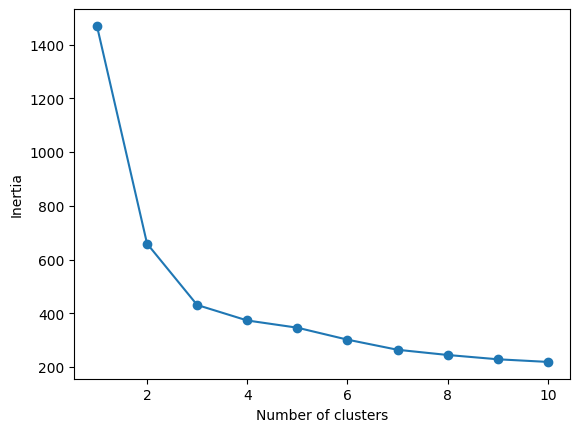

In [15]:
# write your code here.
# Elbow method find the best cluster number

# Implement Elbow method
k = range(1, 11)
inertia = []
for i in k:
  # if you dont write random_state here it will take np.random seed value
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot the graph
plt.plot(k, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



### Step 4: Fit K-mean using the achieved number of clusters.

In [16]:
# write your code here.
#  Fit K-mean using the achieved number of clusters.
# Looking at the graph k = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

### Step 5: Evaluate the performance of K-means using Silhouette coefficient and cluster Purity score.

In [22]:
def cluster_purity(true_labels, predicted_labels):
    # Compute the confusion matrix between true and predicted labels
    cm = confusion_matrix(true_labels, predicted_labels)
    print(cm)
    # Sum the maximum values in each column of the confusion matrix
    # Each column of the confusion matrix represents a cluster
    # We take the maximum because we assign the cluster to the most frequent true class
    purity = np.sum(np.max(cm, axis=0)) / np.sum(cm)
    return purity

In [26]:
# write your code here.
# Using cluster purity
y_predicted = kmeans.labels_
# print(y_predicted.shape)

# CLuster Purity
cluster_purity_value = cluster_purity(y_true, y_predicted)
print(cluster_purity_value)

# Silhouette coefficient score
silhouette_score_value = silhouette_score(X_scaled, y_predicted)
print(silhouette_score_value)


[[ 0  0  0  0]
 [ 2  6 62  0]
 [65  0  5  0]
 [ 0 66  4  0]]
0.919047619047619
0.40072705527512986
